**Curso de Data Analytics Hospital Sírio-Libanês**

**Módulo II**: Aula 2 - Estatística Básica

__Autores/Instrutores__:

* __Osvaldo Pereira__ - https://www.linkedin.com/in/osvaldo-pereira-7502152a/
* __Rodrigo San Martin__ - https://www.linkedin.com/in/rodrigosan-martin/

**Referências**

* https://realpython.com/python-statistics/
* https://pandas.pydata.org/pandas-docs/stable/reference/
* https://seaborn.pydata.org/api.html


# Na última aula vimos ...

* Datasets
* Exploração inicial de um dataframe
* Variáveis quantitativas e qualitativas
* Média, Média ponderada
* Moda
* Mediana
* Operações com colunas em dataframe utilizando Pandas
* Caso de exploração de dados

# Datases I e II: Instrucional e Carteira Medicina da Familia

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('dataset_instrucional.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)
df1.head()

,ID,nominal_1,nominal_2,var_continua_1,var_continua_2,var_discreta_1,var_discreta_2,flag_1,flag_2,peso_1,peso_2
0,1,C,X,52.1,18.2,4,47,0,5,0.010302,0.000368
1,2,C,Y,41.5,886.7,9,50,1,2,0.008206,0.017923
2,3,D,Y,55.2,563.7,8,96,1,5,0.010915,0.011394
3,4,B,Y,85.4,884.2,1,41,0,3,0.016887,0.017873
4,5,C,Y,77.6,859.0,4,95,1,2,0.015344,0.017363


In [3]:
df2 = pd.read_csv('carteira_medicina_familia_sintetica.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)
df2.head()

,id_patient,age_years,sex,number_of_children,flag_married,bmi_kg_m2,height_cm,weight_kg,hdl_mg_dl,ldl_mg_dl,...,index_systolic_blood_pressure,index_diastolic_blood_pressure,index_blood_pressure,sum_index_disease,avg_index_disease,target_index_disease,clients,unidade,mfc,new_score
0,1,23.600347,1,0,0,23.765629,151.049106,54.223261,67.119601,94.935636,...,1,2,3,18,1.636364,0,client04,un06,mfc21,0.000006
1,2,28.180492,1,0,0,22.891895,161.449691,59.670019,69.234692,95.230407,...,1,2,3,18,1.636364,0,client04,un12,mfc39,0.000006
2,3,24.916474,1,0,0,25.687941,156.140406,62.626754,60.938429,99.944524,...,1,2,3,20,1.818182,0,client04,un09,mfc27,0.037970
3,4,28.489040,1,0,0,22.802512,163.527442,60.976709,62.430110,94.763726,...,1,2,3,19,1.727273,0,client05,un15,mfc51,0.000040
4,5,23.580738,1,0,0,23.347263,162.206615,61.428950,64.926035,85.078514,...,1,1,1,16,1.454545,0,client06,un02,mfc59,0.000009


# Medidas de dispersão

Como demonstrado no Desafio II da aula passada, as **medidas de tendência central** possuem algumas **limitações** para a descrição dos dados. Para complementar a informação sobre os dados, podemos utilizar **medidas que avaliam a variabilidade dos dados**, que são as medidas de dispersão.

Text(0.5, 1.0, 'Distribuição Notas na prova final do CFC')

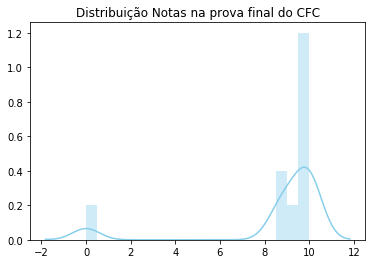

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

notas_finais_cfc = [0,8.7,8.7,9.0,9.5,10,10,10,10,10]
sns.distplot(notas_finais_cfc, color = 'skyblue', label = 'nota_final_CFC', bins = 20).set_title(
                                                                                'Distribuição Notas na prova final do CFC')

Text(0.5, 1.0, 'Distribuição de Altura na Carteira de Medicina Familiar')

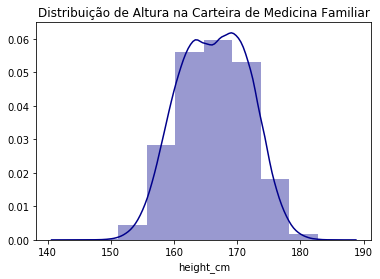

In [5]:
sns.distplot(df2['height_cm'] , color = 'darkblue', label = 'var_continua_1', bins=10, hist=True).set_title(
                                                            'Distribuição de Altura na Carteira de Medicina Familiar')

## Variância

A variância, comumente designada pela letra grega sigma ao quadrado $\sigma^2$ ou pela letra $S$ ou simplesmente $\text{ var}(x)$ sendo x uma variável aleatória, é uma medida de dispersão estatística, ou seja avalia como os dados em uma dada amostra populacional está espalhada. A fórmula matemática para o cálculo da variância é dada pela equação a seguir

\begin{equation}
\sigma^2 = \frac{1}{n-1}\sum_{i = 1}^{}(x_i − \bar{x})^2,
\end{equation}

sendo $\bar{x} = \frac{1}{n}\sum_i x_i$ a média da amostra.

### Exemplo 1

In [6]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
print(var_)

87.263


In [7]:
import statistics
statistics.variance(x)

87.263

### Exemplo 2
Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [8]:
df2['height_cm'].var()

30.332794173289436

## Desvio Padrão
O desvio padrão da amostra está relacionado diretamente a variância. Ele é calculado pela raiz quadrada da variância. É uma medida muito mais útil que a variância por está na mesma unidade que os dados, facilitando sua interpretação.

\begin{equation}
\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}.
\end{equation}

### Exemplo 1

In [9]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)

sd = var_ ** 0.5

print(sd)

9.341466694261667


In [10]:
statistics.variance(x) ** .5

9.341466694261667

In [11]:
statistics.stdev(x)

9.341466694261667

### Exemplo 2
Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [12]:
df2['height_cm'].std()

5.507521599893135

## Percentis
Os percentis de uma amostra são uma ótima indicação sobre um dataset. A Mediana é o percentil 50% indica que a metade superior dos dados é maiores que a mediana e que a metade inferior é menor. Uma formada de dividir um dataset é em 4 partes, deliminadas por 3 quartis. O primeiro quartil representa o percentil 25%, o segundo quartil é a mediana e o terceiro quartil é representado pelo percentil 75%.

### Exemplo 1

In [13]:
df1['var_continua_1'].describe()[['25%', '50%', '75%']]

25%    25.10
50%    54.65
75%    75.55
Name: var_continua_1, dtype: float64

### Exemplo 2

In [14]:
df2['height_cm'].describe()[['25%', '50%', '75%']]

25%    162.148937
50%    166.393740
75%    170.504672
Name: height_cm, dtype: float64

## Quantis
Os 3 quartis são muito úteis na descrição dos dados, mas as vezes temos a necessidade de fazer novos cortes nos dados. Para isso podemos utilizar outros percentis.

### Exemplo 1

In [15]:
notas_finais_cfc

[0, 8.7, 8.7, 9.0, 9.5, 10, 10, 10, 10, 10]

In [16]:
np.quantile(notas_finais_cfc,.20)

8.7

In [17]:
np.quantile(notas_finais_cfc,.40)

9.3

In [18]:
np.quantile(notas_finais_cfc,.60)

10.0

In [19]:
np.quantile(notas_finais_cfc,.80)

10.0

### Exemplo 2

In [20]:
df2['height_cm'].quantile(.01)

154.425428603

### Exemplo 3

In [21]:
df2['height_cm'].quantile(.99)

177.833996924

# Representação Gráfica

## BoxPlot
Ao invés de ficarmos plotando medidas descritivas e de variância dos dados, podemos agilizar a compreensão da distribuição dos dados utiliando gráficos com o boxplot. Esse gráfico apresenta distribuição de dados quantitativos e facilita a comparações de variáveis, muito mais que um resultado de tabela agregada com o .describe() do pandas. A caixa mostra os 3 quantis, com o 3º quantil (percentil 75%) na parte superior, a mediana no meio e o 1º quantil (percentil 25%) na parte inferior. Os "bigodes" ou *whiskers* demonstram a amplitude inter-quartis (Q3-Q1) multiplicado por um fator (normalmente 1,5) somada ao quartil superior e subtraída do quartil inferior, indicando o grau de espalhamento dos dados. Os pontos fora dos whiskers são considerados outliers. 

### Exemplo 1

Notas finais cfc:  [0, 8.7, 8.7, 9.0, 9.5, 10, 10, 10, 10, 10]


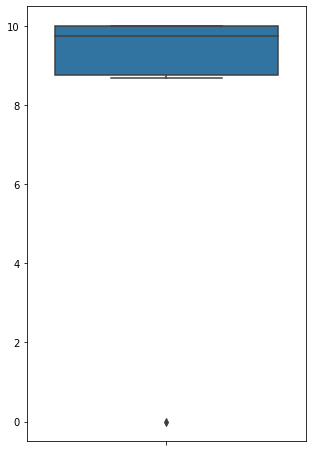

In [22]:
print('Notas finais cfc: ', notas_finais_cfc)
fig, axes = plt.subplots(1, 1, figsize=(5, 8))
sns.boxplot(y= notas_finais_cfc);

### Exemplo 2

In [23]:
df2[['height_cm']].describe()

,height_cm
count,190000.000000
mean,166.302742
std,5.507522
min,142.157209
25%,162.148937
50%,166.393740
75%,170.504672
max,187.250708


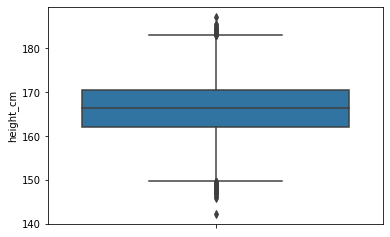

In [24]:
sns.boxplot(y= df2['height_cm'])

### Exemplo 3

Text(0.5, 1.0, 'Boxplot: bar_continua_2')

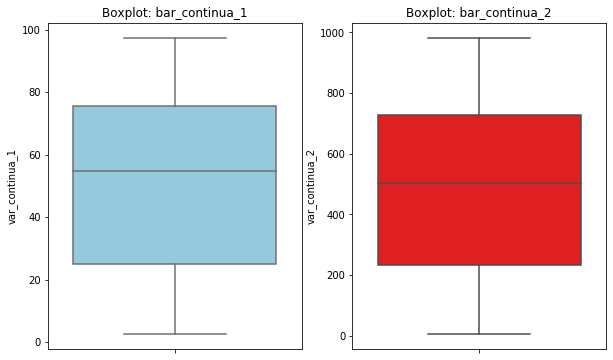

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(y = df1['var_continua_1'] , color = 'skyblue', ax = axes[0]).set_title('Boxplot: bar_continua_1')
sns.boxplot(y = df1['var_continua_2'] , color = 'red', ax = axes[1]).set_title('Boxplot: bar_continua_2')

## Violinplot
O Gráfico de violino plota um box e adiciona um gráfico de densidade rotacionado em 90 graus a figura. É muito util pois além da informação sobre quartis e outliers, mostra a distribuição completa dos dados.

### Exemplo 1

Notas finais cfc:  [0, 8.7, 8.7, 9.0, 9.5, 10, 10, 10, 10, 10]


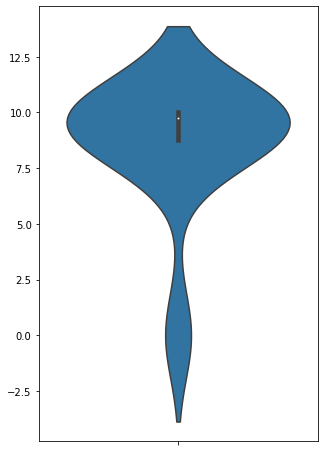

In [26]:
print('Notas finais cfc: ', notas_finais_cfc)
fig, axes = plt.subplots(1, 1, figsize=(5, 8))
sns.violinplot(y= notas_finais_cfc); 

### Exemplo 2

In [27]:
df2[['height_cm']].describe()

,height_cm
count,190000.000000
mean,166.302742
std,5.507522
min,142.157209
25%,162.148937
50%,166.393740
75%,170.504672
max,187.250708


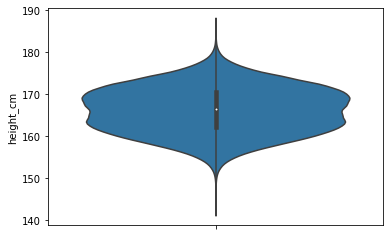

In [28]:
sns.violinplot(y= df2['height_cm'])

### Exemplo 3

Text(0.5, 1.0, 'Violinplot: bar_continua_2')

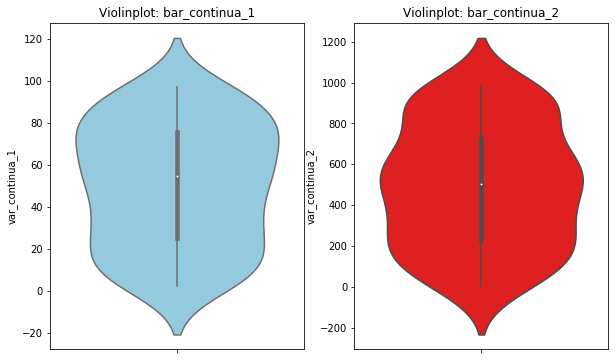

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.violinplot(y = df1['var_continua_1'] , color = 'skyblue', ax = axes[0]).set_title('Violinplot: bar_continua_1')
sns.violinplot(y = df1['var_continua_2'] , color = 'red', ax = axes[1]).set_title('Violinplot: bar_continua_2')

## Pirâmide Etária

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

idade = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34',
       '35-39','40-44','45-49','50-54','55-59','60-64',
       '65-69','70-74','75-79','80-84','85-89','90-94',
       '95-99','100+']

homem = [-49228000, -61283000, -64391000, -52437000, -42955000, 
        -44667000, -31570000, -23887000, -22390000, -20971000, 
        -17685000, -15450000, -13932000, -11020000, -7611000, 
        -4653000, -1952000, -625000, -116000, -14000, -1000]

mulher = [52367000, 64959000, 67161000, 55388000, 45448000, 
          47129000, 33436000, 26710000, 25627000, 23612000, 
          20075000, 16368000, 14220000, 10125000, 5984000, 
          3131000, 1151000, 312000, 49000, 4000, 0]

dfpiramideetaria = {'idade':idade, 'homem':homem, 'mulher':mulher}

dfpiramideetaria = pd.DataFrame(dfpiramideetaria)

dfpiramideetaria.head()

,idade,homem,mulher
0,0-4,-49228000,52367000
1,5-9,-61283000,64959000
2,10-14,-64391000,67161000
3,15-19,-52437000,55388000
4,20-24,-42955000,45448000


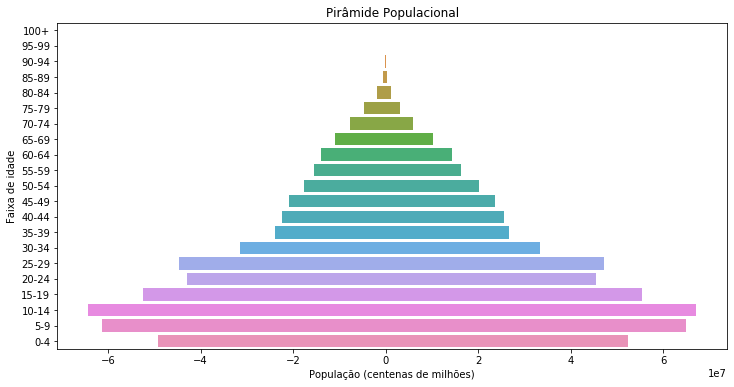

In [35]:
faixaidade = ['100+','95-99','90-94','85-89','80-84','75-79',
              '70-74','65-69','60-64','55-59','50-54','45-49',
              '40-44','35-39','30-34','25-29','20-24','15-19',
              '10-14','5-9','0-4']

f, ax = plt.subplots(figsize = (12,6))

plot_piramide = sns.barplot(x='homem', y='idade', data=dfpiramideetaria, order=faixaidade)

plot_piramide = sns.barplot(x='mulher', y='idade', data=dfpiramideetaria, order=faixaidade)

plot_piramide.set(xlabel="População (centenas de milhões)", 
                  ylabel="Faixa de idade", title = "Pirâmide Populacional")

plt.show()

## Gráfico de barras

Gráficos de barras representam dados categóricos com barras retangulares de comprimento proporcionais aos valores que elas representam. É uma forma de comparar categorias discretas.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

In [36]:
df1.columns

Index(['ID', 'nominal_1', 'nominal_2', 'var_continua_1', 'var_continua_2',
       'var_discreta_1', 'var_discreta_2', 'flag_1', 'flag_2', 'peso_1',
       'peso_2'],
      dtype='object')

### Exemplo 1

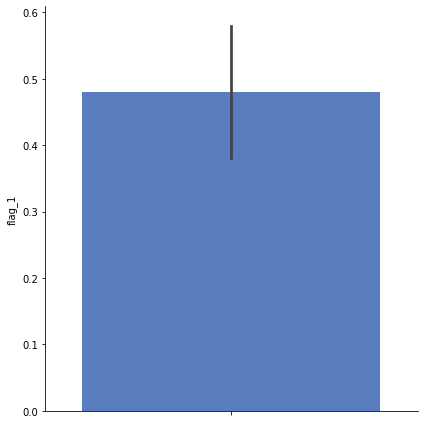

In [37]:
sns.catplot(y="flag_1", data=df1,
                height=6, kind="bar", palette="muted")

### Exemplo 2

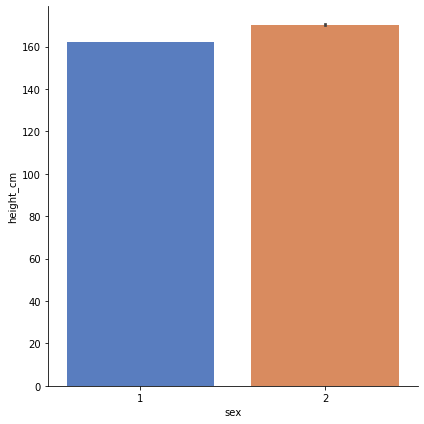

In [38]:
sns.catplot(x = 'sex', y="height_cm", data=df2, height=6, kind="bar", palette="muted")

### Exemplo 3

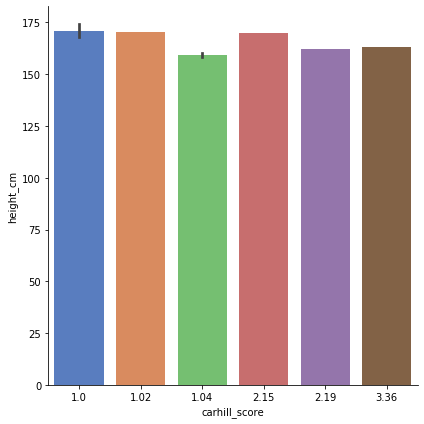

In [39]:
sns.catplot(x = 'carhill_score', y="height_cm", data=df2, height=6, kind="bar", palette="muted")

### Exemplo 4

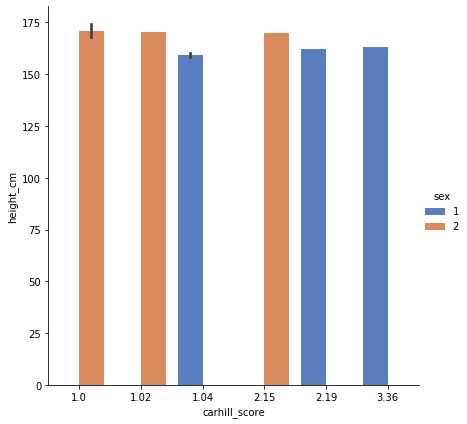

In [40]:
sns.catplot(x = 'carhill_score', y="height_cm", hue = 'sex', data=df2, height=6, kind="bar", palette="muted")

# Caso 2: Paradoxo de Simpson

Nesta análise de caso vamos abordar um tema interessante e complexo, o Paradoxo de Simpson. Este paradoxo é um fenômeno probabilístico e estatístico no qual é possível chegar a conclusões antagônicas a partir de um mesmo dataset, dependendo do nível de agrupamento no qual se está realizando as análises. Este tema é muito importante para cientistas de dados e analistas de dados e de negócios, pois trata do assunto de causalidade em análises. Este tipo de paradoxo é resolvido quando abrimos nossas análises em maior granularidade. 

## O caso Berkeley

Um exemplo icônico do paradoxo de Simpson é o caso da Universidade Berkeley da Califórnia que foi processada na década de 1970 sob a acusação de sexismo nos programas de doutorado de seus institutos, privilegiando homens em detrimento de mulheres. Tudo isto começou com a divulgação do número de aplicantes, dividido por sexo, e o percentual de admitidos para cada um dos sexos. O percentual de homens admitidos era mquase 10 pontos percentuais maior que o de mulheres, como mostra a tabela abaixo, contendo os números reais do processo.

|           |     Men    |          |    Women   |          |
|:---------:|:----------:|:--------:|:----------:|:--------:|
|           | Applicants | Admitted | Applicants | Admitted |
|   Total   |    8.442   |    44%   |    4.321   |    35%   |

Eventualmente a universidade de Berkeley foi absolvida da acusação de sexismo após apresentar os mesmos resultados de forma mais granular e provando que ao contrário do que se imaginava eram as mulheres que eram privilegiadas percentualmente quando a análise era observada por departamentos da universidade, como mostra a tabela abaixo, contendo dados reais do caso Berkeley.

|            |     Men    |          |    Women   |          |
|:----------:|:----------:|:--------:|:----------:|:--------:|
| Department | Applicants | Admitted | Applicants | Admitted |
|      B     |     560    |    63%   |      25    |    68%   |
|      C     |     325    |    37%   |     593    |    34%   |
|      D     |     417    |    33%   |     375    |    35%   |
|      E     |     191    |    28%   |     393    |    24%   |
|      F     |     373    |     6%   |     341    |     7%   |

**Referências sobre o caso Berkeley**
* David Freedman, Robert Pisani, and Roger Purves (2007), Statistics (4th edition), W. W. Norton. ISBN 0-393-92972-8.
* P.J. Bickel, E.A. Hammel and J.W. O'Connell (1975). "Sex Bias in Graduate Admissions: Data From Berkeley" (PDF). Science. 187 (4175): 398–404. doi:10.1126/science.187.4175.398. PMID 17835295.
* http://jse.amstat.org/v22n1/mickel.pdf
* https://pubmed.ncbi.nlm.nih.gov/29484824/

**Observações**
* Tabelas retiradas de: https://en.wikipedia.org/wiki/Simpson%27s_paradox
* Site interessante para criar tabelas em difrentes editores de texto: https://www.tablesgenerator.com/markdown_tables



## Conhecendo o dataset

Vamos começar lendo o dataset sobre o paradoxo de Simpson e fazendo algumas verificações básicas sobre o dataset, como por exemplo verificar quais features fazem parte dos nossos dados, além das informações dos tipos de variáveis e o tamanho do dataset. Para realizar estas análises vamos utilizar funções básicas da biblioteca Pandas.

In [41]:
import pandas as pd

dfsimpson = pd.read_csv('df_paradoxo_simpson.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)

dfsimpson = dfsimpson.drop('Unnamed: 0', axis=1)

dfsimpson.head()

,idade,flag_aceito,sexo,departamento
0,41.938316,0,M,A
1,39.216118,0,M,A
2,40.686148,0,M,A
3,28.523798,1,M,A
4,37.805986,1,M,A


In [42]:
dfsimpson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         4261 non-null   float64
 1   flag_aceito   4261 non-null   int64  
 2   sexo          4261 non-null   object 
 3   departamento  4261 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 133.3+ KB


In [43]:
dfsimpson.describe()

,idade,flag_aceito
count,4261.000000,4261.000000
mean,38.115430,0.386764
std,4.997975,0.487066
min,21.495902,0.000000
25%,34.765253,0.000000
50%,38.085361,0.000000
75%,41.499061,1.000000
max,56.262584,1.000000


## Reproduzindo tabelas de informações e insights

Aqui vamos tentar analisar a quantidade total de pessoas de ambos os sexos e verificar qual o percentual de aprovados por sexo. Nesta seção vamos reproduzir o trabalho que um analista/cientista de dados teria e uma das opções de como fazer essas análises, lembrando que não existe apenas um meio de chegar em um resultado, ainda mais em se tratando de Python.

In [44]:
tab1 = dfsimpson.groupby(['sexo']).agg({'sexo':'count','flag_aceito':'sum'})

tab1

,sexo,flag_aceito
sexo,,
F,1835,598
M,2426,1050


Aqui transformamos a tabela que geramos na célula anterior em um pandas dataframe para que possamos enriquecer este dataframe com informações e cálculos que julguemos relevantes para nossa análise.

In [45]:
tab1 = pd.DataFrame(tab1)

tab1

,sexo,flag_aceito
sexo,,
F,1835,598
M,2426,1050


Aqui acrescentamos uma nova coluna à tabela/dataframe que calculamos anteriormente que nada mais é do que o percentual de aprovados agrupados por ambos os sexos. Percebemos que do total de mulheres (F) cerca de $32%$ foram admitidas nos programas da Universidade de Berkeley, enquanto que dos $2.426$ homems que aplicaram para os programas de pós graduação cerca de $43%$ foram admitidos. Este foi o resultado que levantou toda a questão de sexismo e que culminou com o processo da Universidade Berkeley.

In [46]:
tab1['perc_aceito'] = tab1['flag_aceito']/tab1['sexo']

tab1

,sexo,flag_aceito,perc_aceito
sexo,,,
F,1835,598,0.325886
M,2426,1050,0.432811


Agora vamos abrir a granularidade das nossas análises e ao invés de agrupar apenas no sexo, vamos agrupar a quantidade de pessoas que se inscreveram no processo por departamento e por sexo, e verificar quantos foram aceitos nos programas da universidade.

In [47]:
tab2 = dfsimpson.groupby(['sexo','departamento']).agg({'sexo':'count','flag_aceito':'sum'})

tab2

sexo  flag_aceito
sexo departamento                   
F    A              108           99
     B               25           14
     C              593          211
     D              375          139
     E              393          112
     F              341           23
M    A              560          365
     B              560          350
     C              325          129
     D              417          124
     E              191           63
     F              373           19

In [48]:
tab2 = pd.DataFrame(tab2)

tab2

sexo  flag_aceito
sexo departamento                   
F    A              108           99
     B               25           14
     C              593          211
     D              375          139
     E              393          112
     F              341           23
M    A              560          365
     B              560          350
     C              325          129
     D              417          124
     E              191           63
     F              373           19

In [49]:
tab2['perc_aceito'] = tab2['flag_aceito']/tab2['sexo']

tab2

sexo  flag_aceito  perc_aceito
sexo departamento                                
F    A              108           99     0.916667
     B               25           14     0.560000
     C              593          211     0.355818
     D              375          139     0.370667
     E              393          112     0.284987
     F              341           23     0.067449
M    A              560          365     0.651786
     B              560          350     0.625000
     C              325          129     0.396923
     D              417          124     0.297362
     E              191           63     0.329843
     F              373           19     0.050938

Aqui vamos iniciar a criação de uma tabela geral com todas as informações necessárias para chegarmos aos resultados que a Universidade Berkeley apresentou em sua defesa, demonstrando que não havia sexismo na admissão dos candidatos aos programas de pós graduação.

In [50]:
dfsimpsonaux = dfsimpson.drop(['idade'], axis=1)

dfsimpsonaux = pd.DataFrame(dfsimpsonaux).copy()

dfsimpsonaux['flag_nao_aceito'] = abs(1 - dfsimpsonaux['flag_aceito'])

dfsimpsonaux.head()

,flag_aceito,sexo,departamento,flag_nao_aceito
0,0,M,A,1
1,0,M,A,1
2,0,M,A,1
3,1,M,A,0
4,1,M,A,0


In [51]:
tabela = pd.pivot_table(dfsimpsonaux,
               index = ['departamento'],
               values = ['flag_aceito','flag_nao_aceito'],
               columns = ['sexo'],
               fill_value = '',
               aggfunc = np.sum,
               #observed = False,
               margins = True,
               margins_name = 'Total'
              )

tabela

flag_aceito             flag_nao_aceito            
sexo                   F     M Total               F     M Total
departamento                                                    
A                     99   365   464               9   195   204
B                     14   350   364              11   210   221
C                    211   129   340             382   196   578
D                    139   124   263             236   293   529
E                    112    63   175             281   128   409
F                     23    19    42             318   354   672
Total                598  1050  1648            1237  1376  2613

In [52]:
tabela = pd.DataFrame(tabela)

tabela = pd.DataFrame(tabela.to_records())

tabela

,departamento,"('flag_aceito', 'F')","('flag_aceito', 'M')","('flag_aceito', 'Total')","('flag_nao_aceito', 'F')","('flag_nao_aceito', 'M')","('flag_nao_aceito', 'Total')"
0,A,99,365,464,9,195,204
1,B,14,350,364,11,210,221
2,C,211,129,340,382,196,578
3,D,139,124,263,236,293,529
4,E,112,63,175,281,128,409
5,F,23,19,42,318,354,672
6,Total,598,1050,1648,1237,1376,2613


Terminamos de criar a tabela base para podermos trabalhar e analisar. Como exercício proposto vamos deixar para o leitor calcular as colunas de percentual e subtotal para os insights necessários.

In [53]:
tabela.columns = ['departamento','F_aceito','M_aceito','total_aceito','F_nao_aceito','M_nao_aceito','total_nao_aceito']

tabela

,departamento,F_aceito,M_aceito,total_aceito,F_nao_aceito,M_nao_aceito,total_nao_aceito
0,A,99,365,464,9,195,204
1,B,14,350,364,11,210,221
2,C,211,129,340,382,196,578
3,D,139,124,263,236,293,529
4,E,112,63,175,281,128,409
5,F,23,19,42,318,354,672
6,Total,598,1050,1648,1237,1376,2613


In [54]:
tabela.to_csv("tabela_exercicio_simpson.csv",encoding='ISO-8859-1',sep=';')

**Apoio didático**

* https://www.youtube.com/watch?v=ebEkn-BiW5k&t=19s
* https://youtu.be/fDcjhAKuhqQ?t=1701
* https://www.youtube.com/watch?v=4zn17KICsQM
* https://www.youtube.com/watch?v=Ye0lmQzgqvM


**Referências**

* https://pt.wikipedia.org/wiki/Paradoxo_de_Simpson
* https://www.youtube.com/watch?v=ebEkn-BiW5k
* https://www.youtube.com/watch?v=E_ME4P9fQbo
* https://plato.stanford.edu/entries/paradox-simpson/